In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [121]:
data="/content/spam_or_not_spam.csv"

In [122]:
df=pd.read_csv(data)

In [123]:
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [124]:
df.dtypes

email    object
label     int64
dtype: object

In [125]:
df.shape

(3000, 2)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [127]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [128]:
display(df["label"].value_counts())

0    2500
1     500
Name: label, dtype: int64

In [129]:
df.isnull().sum()

email    1
label    0
dtype: int64

In [130]:
df = df.dropna()

In [131]:
df.isnull().sum()

email    0
label    0
dtype: int64

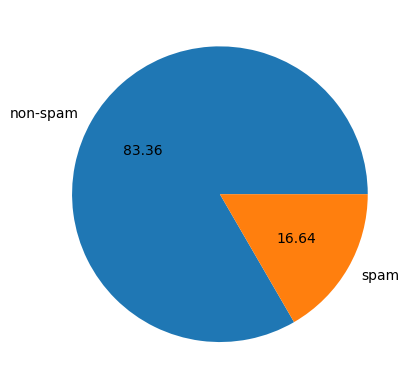

In [132]:
plt.pie(df["label"].value_counts(),labels=["non-spam","spam"],autopct="%0.2f")
plt.show()

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df["email"],df["label"],test_size=0.3,random_state=3)

In [134]:
print(x_train.shape)
print(x_test.shape)

(2099,)
(900,)


In [135]:
transforms=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
x_train_tranforms=transforms.fit_transform(x_train)
x_test_transforms=transforms.transform(x_test)
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [136]:
print(x_train_tranforms)

  (0, 17149)	0.2214096745679931
  (0, 17439)	0.2214096745679931
  (0, 17434)	0.2214096745679931
  (0, 16985)	0.2214096745679931
  (0, 16999)	0.2214096745679931
  (0, 23395)	0.11456784313192528
  (0, 21511)	0.10298719688588846
  (0, 5176)	0.11427022144426334
  (0, 24013)	0.17154973424334305
  (0, 7853)	0.18654858527400356
  (0, 9488)	0.10482263316766298
  (0, 14298)	0.1911604490610973
  (0, 4450)	0.09312114414411722
  (0, 19017)	0.07784677242174196
  (0, 15897)	0.15112530791931306
  (0, 22912)	0.1272310197519827
  (0, 7941)	0.17662326230208428
  (0, 26970)	0.06538987413901992
  (0, 18217)	0.1387508743571642
  (0, 27185)	0.14699517062952966
  (0, 3766)	0.15733480441894668
  (0, 7849)	0.16026670968496817
  (0, 26000)	0.14021581061402727
  (0, 21645)	0.12369262658562967
  (0, 8581)	0.1119973372641335
  :	:
  (2098, 8831)	0.06858795925349706
  (2098, 5444)	0.07193399963247546
  (2098, 2578)	0.06138956518258438
  (2098, 18619)	0.18210290262550569
  (2098, 27656)	0.08822350649446033
  (2098, 

In [137]:
model=LogisticRegression()
model.fit(x_train_tranforms,y_train)

LogisticRegression()

In [138]:
prediction=model.predict(x_train_tranforms)
accuary=accuracy_score(y_train,prediction)
print(accuary)

0.9661743687470223


In [139]:
email=[input("Email:")]
email_transforms=transforms.transform(email)
prediction=model.predict(email_transforms)
if(prediction[0]==1):
  print("Spam")
else:
  print("Not-Spam")

Email:Iterable over raw text documents expected, string object received.
Not-Spam
